In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import seaborn as sns

In [2]:
DATA_PATH = 'data/data.csv'
PRODUCTS_PATH = 'data/products.csv'

In [50]:
pd.set_option('display.max_columns', 57)

plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['figure.dpi'] = 80
plt.rcParams['axes.facecolor'] = 'FFFFFF'
plt.rcParams['legend.facecolor'] = 'FFFFFF'
# figure().patch.set_facecolor('white')

In [4]:
data =  pd.read_csv(DATA_PATH, sep=',', parse_dates=['doc_date', 'created_at'], low_memory=False)
data.head()

,order_price_without_vat,order_price_with_vat,bill_country,setting_currency_id,created_at,shop_basket_id,doc_date,exchange_currency_rate,source,canceled_date,...,catalog_segment_id,categories_ancestor_ids,categories_descendant_ids,category_full_name_path,default_warranty_period,brand_name,brand_parameterized,segment_name,segment_parameterezied,segment_status
0,562.29,674.75,BG,1,2020-04-26 19:25:20.842503,1136409,2020-04-26,1.9558,eshop,NaN,...,1.0,"{3,4,178}",{},"{Music,Guitars,Capos,""Capo for acoustic guitar""}",24.0,Musedo,musedo,Music,music,active
1,562.29,674.75,BG,1,2020-04-26 19:25:20.842503,1136409,2020-04-26,1.9558,eshop,NaN,...,1.0,"{3,607,760,761}",{},"{Music,""Studio / PA"",Cables,""Complete Cables"",...",24.0,Lewitz,lewitz,Music,music,active
2,562.29,674.75,BG,1,2020-04-26 19:25:20.842503,1136409,2020-04-26,1.9558,eshop,NaN,...,1.0,"{3,4,151}",{},"{Music,Guitars,""Guitar Picks"",""Medium Picks""}",24.0,Fender,fender,Music,music,active
3,562.29,674.75,BG,1,2020-04-26 19:25:20.842503,1136409,2020-04-26,1.9558,eshop,NaN,...,1.0,"{3,4}",{},"{Music,Guitars,""Guitar Foot Rest""}",24.0,GEWA,gewa,Music,music,active
4,562.29,674.75,BG,1,2020-04-26 19:25:20.842503,1136409,2020-04-26,1.9558,eshop,NaN,...,1.0,"{3,4,151}",{},"{Music,Guitars,""Guitar Picks"",""Light Picks""}",24.0,Boss,boss,Music,music,active


In [5]:
products = pd.read_csv(PRODUCTS_PATH, sep=',')
products.head()

,variant_id,category_id,brand_id,status,is_new,reviews_count,reviews_average_score_price,reviews_average_score_quality,reviews_average_score_properties,reviews_average_score_overall,in_sets_count,is_in_stock,is_returnable,purchase_price,eshop_stock_count,country_of_origin_code,name
0,353734,3495.0,7808.0,draft,f,0,0.0,0.0,0.0,0.0,0,t,f,65.33333,0.0,GB,Stereoizer
1,241263,1203.0,1390.0,active,f,0,0.0,0.0,0.0,0.0,0,f,t,293.97000,0.0,UA,Sport Pro Leather Jacket Black/White 48
2,25632,332.0,32.0,ended,f,0,0.0,0.0,0.0,0.0,0,f,t,NaN,0.0,JP,WJ336300
3,25633,196.0,107.0,ended,f,0,0.0,0.0,0.0,0.0,0,f,t,NaN,0.0,NaN,Vintage Gold
4,311334,NaN,2.0,draft,f,0,0.0,0.0,0.0,0.0,0,f,t,NaN,0.0,NaN,(B-Stock) #947558


In [6]:
data.dtypes

order_price_without_vat                               float64
order_price_with_vat                                  float64
bill_country                                           object
setting_currency_id                                     int64
created_at                                     datetime64[ns]
shop_basket_id                                          int64
doc_date                                       datetime64[ns]
exchange_currency_rate                                float64
source                                                 object
canceled_date                                          object
currency_code                                          object
currency_symbol                                        object
price_round_system                                      int64
basket_total_price_before_discount_with_vat           float64
basket_total_price_with_vat                           float64
count_basket_items                                      int64
basket_c

In [7]:
products.dtypes

variant_id                            int64
category_id                         float64
brand_id                            float64
status                               object
is_new                               object
reviews_count                         int64
reviews_average_score_price         float64
reviews_average_score_quality       float64
reviews_average_score_properties    float64
reviews_average_score_overall       float64
in_sets_count                         int64
is_in_stock                          object
is_returnable                        object
purchase_price                      float64
eshop_stock_count                   float64
country_of_origin_code               object
name                                 object
dtype: object

In [8]:
data.shape

(3661847, 57)

In [9]:
products.shape

(352491, 17)

# Clearing data

## **Data.csv insights**

In [10]:
# Change all prices to EUR so we can easily compare them, this is one time operation 
non_eur_columns = ['order_price_without_vat', 'order_price_with_vat', 'basket_total_price_before_discount_with_vat', 
                   'basket_total_price_with_vat', 'item_unit_price_with_vat', 'item_unit_price_without_vat', 'item_total_discount_with_vat']

for column_name in non_eur_columns:
    data[column_name] =  round(data[column_name] / data.exchange_currency_rate, 2)

In [11]:
def create_others_value_counts(threshold : float, df : pd.DataFrame, column_name : str) -> pd.Series:
    """
    Function which groups all of the values under threshold into 'others' with preserving of original categories
    Args
        threshold - float in range <0,1> as a threshold for key to be marked as others (desired percentage / 100)
        df - desired DataFrame containing given column
        column_name - string with the exact name of a desired Series
    Returns
        pd.Series - returns Series with the new 'others' group
    """
    
    over_thr = df[column_name].value_counts(normalize=True).loc[lambda x : x > threshold]
    under_thr = df[column_name].value_counts(normalize=True).loc[lambda x : x <= threshold]
    merged_series =  pd.concat([over_thr, pd.Series(under_thr.sum(), index=['others'])])
    return merged_series

In [12]:
data.isnull().sum()

order_price_without_vat                              0
order_price_with_vat                                 0
bill_country                                         0
setting_currency_id                                  0
created_at                                           0
shop_basket_id                                       0
doc_date                                            76
exchange_currency_rate                               0
source                                               0
canceled_date                                  3496480
currency_code                                        0
currency_symbol                                      0
price_round_system                                   0
basket_total_price_before_discount_with_vat          0
basket_total_price_with_vat                          0
count_basket_items                                   0
basket_count_products                                0
basket_type                                          0
item_quant

In [13]:
# If canceled_date is NOT na then the order was canceled and we don't want to have it in data
# We are only keeping NaN canceled dates and then deleting this column (full of nans now)
data = data[data.canceled_date.isna()]
data.drop('canceled_date', inplace=True, axis=1)

In [14]:
data.basket_type.unique()

array(['standard', 'internal', 'express_checkout'], dtype=object)

In [15]:
# Dropping all other NaNs from the data dataframe, since they are in important columns
data.dropna(inplace=True)

In [16]:
products.isnull().sum()

variant_id                              0
category_id                          6992
brand_id                                2
status                                  0
is_new                                  0
reviews_count                           0
reviews_average_score_price             0
reviews_average_score_quality           0
reviews_average_score_properties        0
reviews_average_score_overall           0
in_sets_count                           0
is_in_stock                             0
is_returnable                           0
purchase_price                      52741
eshop_stock_count                       0
country_of_origin_code              16023
name                                    1
dtype: int64

In [17]:
print(data.source.unique())
# There is only one value in source column, so that coulumn can be dropped as well, as it brings nothing
data.drop('source', inplace=True, axis=1)

['eshop']


In [54]:
data[data.item_type == 'gift'].sort_values(by='item_unit_price_with_vat', ascending=False)

,order_price_without_vat,order_price_with_vat,bill_country,setting_currency_id,created_at,shop_basket_id,doc_date,exchange_currency_rate,currency_code,currency_symbol,price_round_system,basket_total_price_before_discount_with_vat,basket_total_price_with_vat,count_basket_items,basket_count_products,basket_type,item_quantity,item_type,item_unit_price_with_vat,item_unit_price_without_vat,item_total_discount_with_vat,product_id,product_code,catalog_category_id,catalog_brand_id,product_name,product_status,reviews_count,reviews_average_score_price,reviews_average_score_quality,reviews_average_score_properties,reviews_average_score_overall,reviews_average_score,is_in_stock,is_ended,is_new,is_boosted,product_purchase_price,eshop_stock_count,is_fifo,product_name_parameterize,category,tree_path,category_name_parameterized,category_status,catalog_segment_id,categories_ancestor_ids,categories_descendant_ids,category_full_name_path,default_warranty_period,brand_name,brand_parameterized,segment_name,segment_parameterezied,segment_status
2953,174.70,209.63,BG,1,2019-06-13 16:29:49.624971,186905,2019-06-13,1.9558,BGN,лв,0,230.60,209.63,2,2,standard,1,gift,0.0,0.0,0.51,108731,294426,2026.0,369,Tech Bookmark,ended,44,75.0,75.0,75.0,75.0,86.136364,f,t,f,f,0.030000,0.0,f,tech-bookmark,Merch - Drobnosti,000:099:008,merch-drobnosti,active,13.0,"{1,2014}",{},"{""Muziker Merch"",""Merch - Miscellaneous""}",24.0,Muziker,muziker,General,general,inactive
2312488,96.58,116.86,CZ,4,2019-07-26 11:46:24.044654,369942,2019-07-26,26.4680,CZK,Kč,2,124.79,116.86,2,2,standard,1,gift,0.0,0.0,0.49,108726,294421,2026.0,369,Music Bookmark,active,32,62.5,87.5,72.5,77.5,88.750000,t,t,f,f,0.035000,3719.0,f,music-bookmark,Merch - Drobnosti,000:099:008,merch-drobnosti,active,13.0,"{1,2014}",{},"{""Muziker Merch"",""Merch - Miscellaneous""}",24.0,Muziker,muziker,General,general,inactive
2312507,59.51,75.57,HU,10,2019-07-26 14:31:02.718425,366422,2019-07-26,359.9200,HUF,Ft,3,83.60,75.57,2,2,standard,1,gift,0.0,0.0,0.53,108726,294421,2026.0,369,Music Bookmark,active,32,62.5,87.5,72.5,77.5,88.750000,t,t,f,f,0.035000,3719.0,f,music-bookmark,Merch - Drobnosti,000:099:008,merch-drobnosti,active,13.0,"{1,2014}",{},"{""Muziker Merch"",""Merch - Miscellaneous""}",24.0,Muziker,muziker,General,general,inactive
2312506,129.92,155.90,SK,6,2019-07-26 14:29:58.353372,370434,2019-07-26,1.0000,EUR,€,0,155.49,155.90,2,2,standard,1,gift,0.0,0.0,0.49,108726,294421,2026.0,369,Music Bookmark,active,32,62.5,87.5,72.5,77.5,88.750000,t,t,f,f,0.035000,3719.0,f,music-bookmark,Merch - Drobnosti,000:099:008,merch-drobnosti,active,13.0,"{1,2014}",{},"{""Muziker Merch"",""Merch - Miscellaneous""}",24.0,Muziker,muziker,General,general,inactive
2312505,31.40,37.67,SK,6,2019-07-26 14:29:53.026972,370232,2019-07-26,1.0000,EUR,€,0,34.66,37.67,6,6,standard,1,gift,0.0,0.0,0.49,108726,294421,2026.0,369,Music Bookmark,active,32,62.5,87.5,72.5,77.5,88.750000,t,t,f,f,0.035000,3719.0,f,music-bookmark,Merch - Drobnosti,000:099:008,merch-drobnosti,active,13.0,"{1,2014}",{},"{""Muziker Merch"",""Merch - Miscellaneous""}",24.0,Muziker,muziker,General,general,inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954402,2.16,2.59,SK,6,2019-08-05 17:49:50.279707,392924,2019-08-05,1.0000,EUR,€,0,1.08,2.59,2,2,standard,1,gift,0.0,0.0,0.49,108726,294421,2026.0,369,Music Bookmark,active,32,62.5,87.5,72.5,77.5,88.750000,t,t,f,f,0.035000,3719.0,f,music-bookmark,Merch - Drobnosti,000:099:008,merch-drobnosti,active,13.0,"{1,2014}",{},"{""Muziker Merch"",""Merch - Miscellaneous""}",24.0,Muziker,muziker,General,general,inactive
954401,29.42,35.01,RO,13,2019-08-05 17:48:07.996898,385079,2019-08-05,4.8555,RON,lei,0,33.16,35.01,5,6,standard,1,gift,0.0,0.0,0.41,108726,294421,2026.0,369,Music Bookmark,active,32,62.5,87.5,72.5,77.5,88.750000,t,t,f,f,0.035000,37

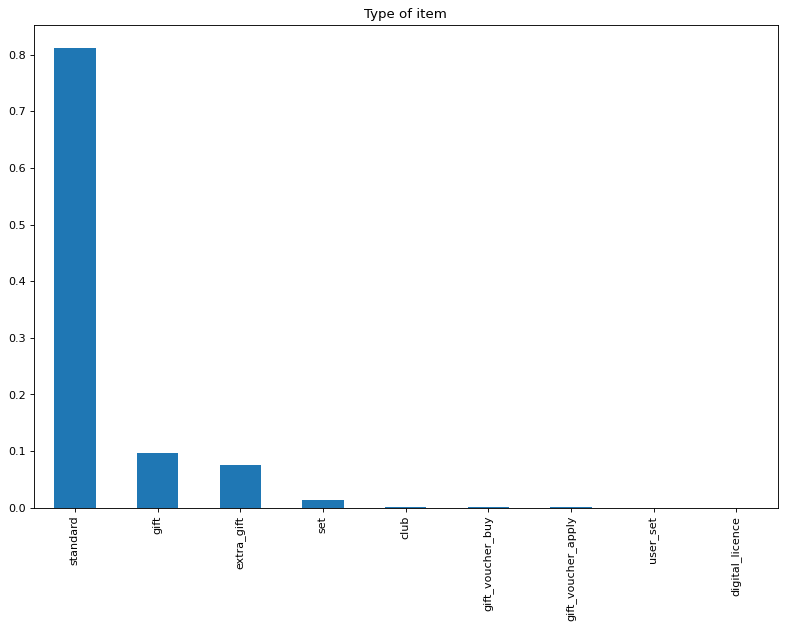

In [44]:
figure().patch.set_facecolor('white')
data.item_type.value_counts(normalize=True).plot(kind='bar', title='Type of item')
plt.show()

In [20]:
data.item_type.unique()

array(['standard', 'extra_gift', 'gift_voucher_buy', 'gift_voucher_apply',
       'set', 'user_set', 'gift', 'club', 'digital_licence'], dtype=object)

### Shop orders EDA

In [51]:
data[data.basket_total_price_with_vat.__eq__(0)].head(10)

,order_price_without_vat,order_price_with_vat,bill_country,setting_currency_id,created_at,shop_basket_id,doc_date,exchange_currency_rate,currency_code,currency_symbol,price_round_system,basket_total_price_before_discount_with_vat,basket_total_price_with_vat,count_basket_items,basket_count_products,basket_type,item_quantity,item_type,item_unit_price_with_vat,item_unit_price_without_vat,item_total_discount_with_vat,product_id,product_code,catalog_category_id,catalog_brand_id,product_name,product_status,reviews_count,reviews_average_score_price,reviews_average_score_quality,reviews_average_score_properties,reviews_average_score_overall,reviews_average_score,is_in_stock,is_ended,is_new,is_boosted,product_purchase_price,eshop_stock_count,is_fifo,product_name_parameterize,category,tree_path,category_name_parameterized,category_status,catalog_segment_id,categories_ancestor_ids,categories_descendant_ids,category_full_name_path,default_warranty_period,brand_name,brand_parameterized,segment_name,segment_parameterezied,segment_status
44675,-11.08,0.0,BG,1,2021-04-13 08:52:44.828116,2817255,2021-04-13,1.9558,BGN,лв,0,51.64,0.0,4,3,standard,1,standard,49.08,40.90,0.00,36320,222014,3195.0,1,X-Touch Mini,active,3,100.000000,100.000000,100.000000,100.000000,100.000000,t,f,f,f,44.894545,11.0,f,x-touch-mini,Ovládače DAW,001:005:001:017,ovladace-daw,active,1.0,"{3,607,608}",{},"{Music,""Studio / PA"",""Studio and Recording"",""D...",24.0,Behringer,behringer,Music,music,active
44676,-11.08,0.0,BG,1,2021-04-13 08:52:44.828116,2817255,2021-04-13,1.9558,BGN,лв,0,51.64,0.0,4,3,standard,1,gift_voucher_apply,-66.47,-66.47,66.47,114305,300000,2.0,369,Gift Card,active,63,87.500000,87.500000,87.500000,87.500000,97.619048,t,f,f,f,0.009998,5663.0,f,gift-card,Poukážky,000:098,poukazky,active,13.0,{1},{},"{Spoločné,Vouchers}",24.0,Muziker,muziker,General,general,inactive
44677,-11.08,0.0,BG,1,2021-04-13 08:52:44.828116,2817255,2021-04-13,1.9558,BGN,лв,0,51.64,0.0,4,3,standard,1,standard,0.51,0.43,0.00,24900,210593,781.0,16,8D Jazz American Classic,active,26,74.000000,74.000000,69.200000,70.400000,73.076923,t,f,f,f,0.271447,74.0,f,8d-jazz-american-classic,Káblové viazače a svorky,001:005:010:003,kablove-viazace-a-svorky,active,1.0,"{3,607,760}",{},"{Music,""Studio / PA"",Cables,""Velcro Cable Stra...",24.0,Bespeco,bespeco,Music,music,active
44678,-11.08,0.0,BG,1,2021-04-13 08:52:44.828116,2817255,2021-04-13,1.9558,BGN,лв,0,51.64,0.0,4,3,standard,1,standard,2.05,1.70,0.00,212776,358160,786.0,53,CC165S,active,1,0.000000,0.000000,0.000000,0.000000,100.000000,t,f,f,f,0.684912,38.0,f,cc165s,"Konektory JACK 6,3 mm",001:005:011:001,konektory-jack-6-3-mm,active,1.0,"{3,607,785}",{},"{Music,""Studio / PA"",Connectors,""JACK Connecto...",24.0,Soundking,soundking,Music,music,active
65498,-11.50,0.0,BG,1,2022-02-18 09:19:25.263434,4432085,2022-02-18,1.9558,BGN,лв,0,54.20,0.0,4,5,standard,1,standard,32.72,27.27,0.00,193015,338399,2042.0,1871,Random Access Memories (2 LP),active,13,100.000000,100.000000,100.000000,100.000000,100.000000,t,f,f,f,20.296623,77.0,f,random-access-memories-2-lp,LP Platne,014:000,lp-platne,active,16.0,{3526},{},"{""LP platne a CD"",""Vinyl Records""}",24.0,Daft Punk,daft-punk,LPs and CDs,lps-and-cds,inactive
65499,-11.50,0.0,BG,1,2022-02-18 09:19:25.263434,4432085,2022-02-18,1.9558,BGN,лв,0,54.20,0.0,4,5,standard,3,standard,0.51,0.43,0.00,150574,315957,154.0,13,351 Shape Premium Picks Ocean Turquoise Heavy,active,62,95.454545,95.454545,95.454545,95.454545,97.258065,t,f,f,f,0.152111,16758.0,f,351-shape-premium-picks-ocean-turquoise-heavy,Heavy trsátka,001:001:015:003,heavy-trsatka,active,1.0,"{3,4,151}",{},"{Music,Guitars,""Guitar Picks"",""Heavy Picks""}",24.0,Fender,fender,Music,music,active
65500,-11.50,0.0,BG,1,2022-02-18 09:19:25.263434,4432085,2022-02-18,1.9558,BGN,лв,0,54.20,0.0,4,5,standard,1,gift_voucher_apply,-69.03,-69.03,69.03,114305,300000,2.0,369,Gift Card,active,63,87.500000,87.500000,87.500000,87.500000,97.619048,t,f,f,f,0.009998,566

Median order price with vat 99.29 €
Mean order price with vat 261.43 €


<AxesSubplot:xlabel='order_price_with_vat', ylabel='Count'>

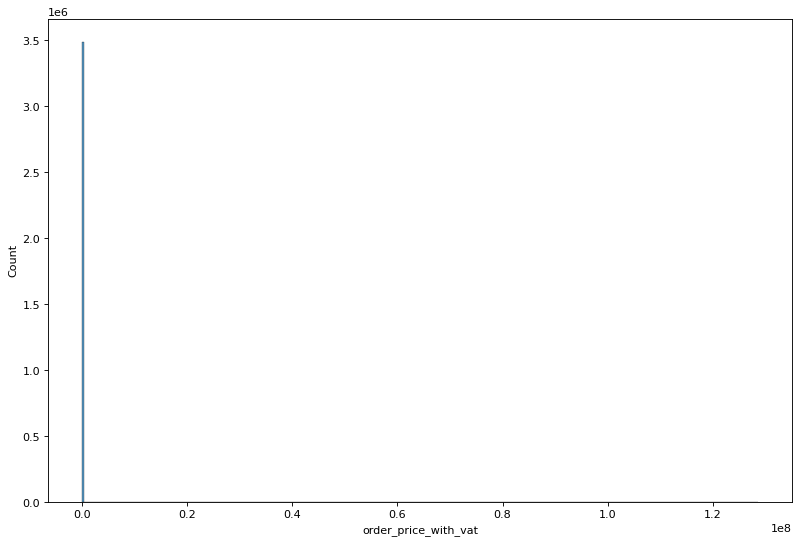

In [22]:
print(f'Median order price with vat {round(data.order_price_with_vat.median(), 2)} €')
print(f'Mean order price with vat {round(data.order_price_with_vat.mean(), 2)} €')
sns.histplot(data.order_price_with_vat, bins=250)

In [23]:
    """
    so.price_without_vat AS order_price_without_vat,  asi nebudem robit, spravim len pre with vat
    so.price_with_vat AS order_price_with_vat,
    so.bill_country,
    so.setting_currency_id,
    so.created_at,
    so.shop_basket_id,
    so.doc_date,
    so.exchange_currency_rate,
    so.source_type AS source,
    """

'\nso.price_without_vat AS order_price_without_vat,  asi nebudem robit, spravim len pre with vat\nso.price_with_vat AS order_price_with_vat,\nso.bill_country,\nso.setting_currency_id,\nso.created_at,\nso.shop_basket_id,\nso.doc_date,\nso.exchange_currency_rate,\nso.source_type AS source,\n'

In [24]:
TODO = list(data.columns)
TODO.remove('bill_country')
TODO.remove('brand_name')
TODO

['order_price_without_vat',
 'order_price_with_vat',
 'setting_currency_id',
 'created_at',
 'shop_basket_id',
 'doc_date',
 'exchange_currency_rate',
 'currency_code',
 'currency_symbol',
 'price_round_system',
 'basket_total_price_before_discount_with_vat',
 'basket_total_price_with_vat',
 'count_basket_items',
 'basket_count_products',
 'basket_type',
 'item_quantity',
 'item_type',
 'item_unit_price_with_vat',
 'item_unit_price_without_vat',
 'item_total_discount_with_vat',
 'product_id',
 'product_code',
 'catalog_category_id',
 'catalog_brand_id',
 'product_name',
 'product_status',
 'reviews_count',
 'reviews_average_score_price',
 'reviews_average_score_quality',
 'reviews_average_score_properties',
 'reviews_average_score_overall',
 'reviews_average_score',
 'is_in_stock',
 'is_ended',
 'is_new',
 'is_boosted',
 'product_purchase_price',
 'eshop_stock_count',
 'is_fifo',
 'product_name_parameterize',
 'category',
 'tree_path',
 'category_name_parameterized',
 'category_status'

In [25]:
# calculate how many brands there are as well as the most common
print(data.brand_name.value_counts())

Muziker             468396
Fender              132268
Dunlop               97355
Soundking            90129
Lewitz               61292
                     ...  
Pargate                  1
Melissa Menago           1
Monuments                1
Steve Winwood            1
Benjamin Britten         1
Name: brand_name, Length: 5259, dtype: int64


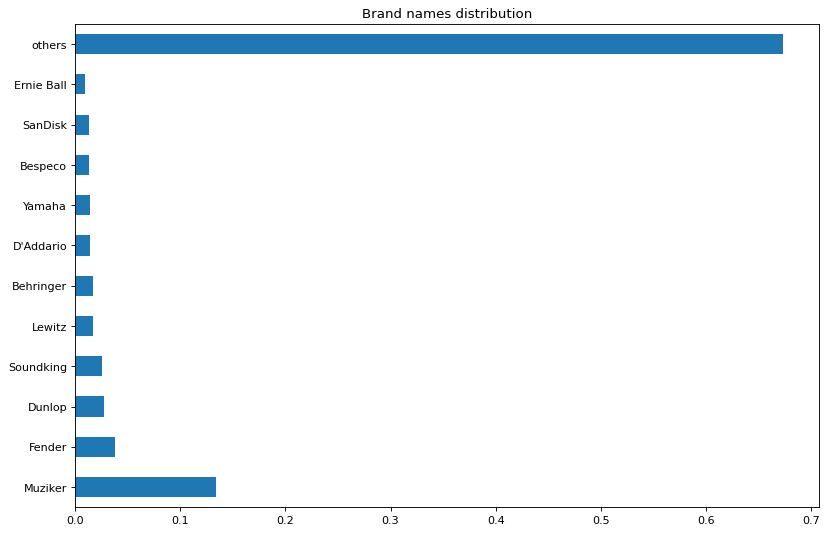

In [26]:
counted_countries = create_others_value_counts(0.01, data, 'brand_name') 
counted_countries.plot(kind='barh', title='Brand names distribution')
plt.show()

As we can see above, there is HUGE variety of brands in products (3185) with only 12 of them having more than 1% of products.

Percentage of bill countries, with the threshold of 0.5% to be shown as bill country of an order.

Bill countries in data: ['BG' 'CZ' 'DE' 'SK' 'HR' 'RO' 'SI' 'HU' 'PL' 'AT' 'FR' 'IT' 'GB' 'SE'
 'NL' 'IE' 'DK' 'ES' 'BE' 'LV' 'EE' 'PT' 'GR' 'FI' 'CH' 'LT' 'LU' 'EL'
 'TR' 'UA' 'RS' 'BA'].
 That is 32 countries as bill countries.


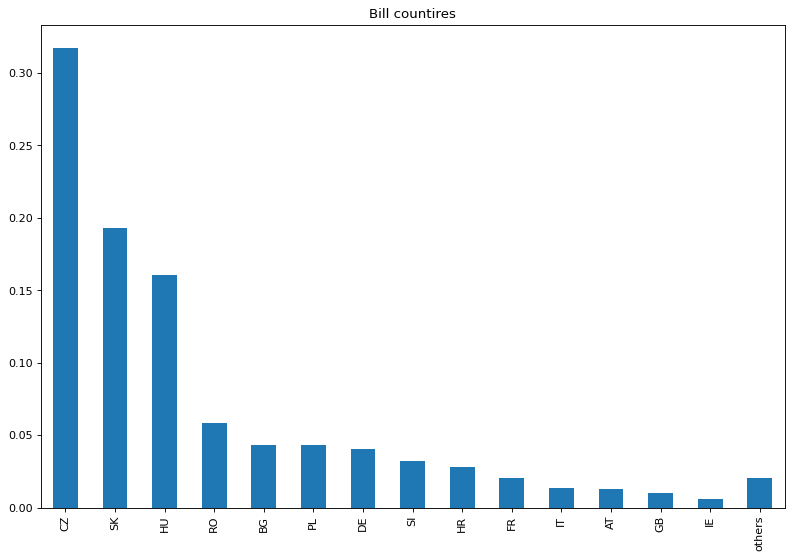

In [27]:
print(f'Bill countries in data: {data.bill_country.unique()}.\n That is {len(data.bill_country.unique())} countries as bill countries.')

figure().patch.set_facecolor('white')
counted_countries = create_others_value_counts(0.005, data, 'bill_country') 
counted_countries.plot(kind='bar', title='Bill countires')
plt.show()

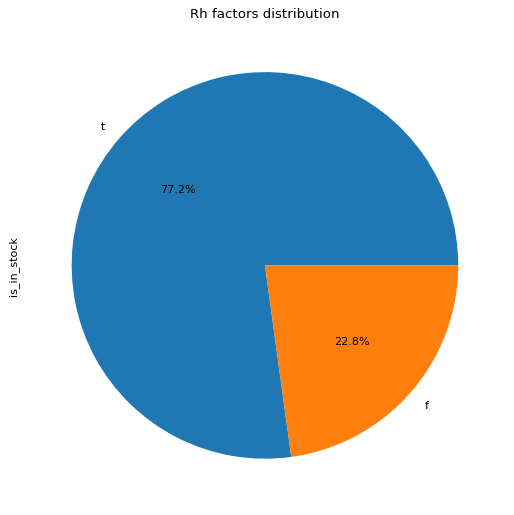

In [28]:
figure().patch.set_facecolor('white')
data.is_in_stock.value_counts().plot(kind='pie', title='Rh factors distribution', autopct='%1.1f%%')
plt.show()

In [29]:
"""
TODO preratat sumy na Eura vsade, zaokruhlit


"""

'\nTODO preratat sumy na Eura vsade, zaokruhlit\n\n\n'

In [30]:
"""
Poznamky

Kosiky sa pouzivaju len pri novom eshope. Na data o starom eshope pouzivam invoices - iba pre typ old eshop. To potom zlucujem dokopy.

"""

'\nPoznamky\n\nKosiky sa pouzivaju len pri novom eshope. Na data o starom eshope pouzivam invoices - iba pre typ old eshop. To potom zlucujem dokopy.\n\n'